In [1]:
import utility_common as common
from utility_dfcutter import *
from torch_model import *

# 1. Load Input-Label and Model

In [2]:
# Templetes(counts) and Targets
name = common.getBaseDirectory() + "data/templates/templates{}_.npy"
X = tc.from_numpy( np.load(name.format('X')) ).type(tc.FloatTensor).to(device)
Y = tc.from_numpy( np.load(name.format('Y')) ).type(tc.FloatTensor).to(device)
#Y = tc.sum(X,1).to(device)

In [3]:
# Model and optimizer
model     = PredictiveModel().to(device)
optimizer = torch.optim.LBFGS(model.parameters(),
                              lr=0.005, max_iter=1e4, 
                              tolerance_grad=1e-05, 
                              tolerance_change=1e-9) 

# 2. Training 

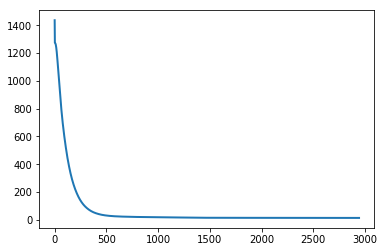

In [4]:
losses = []
# define backprop step
def closure():
    optimizer.zero_grad()
    y,regu = model.forward(X)
    loss = tc.sum( (y-Y)**2/(2*Y) ) + regu
    loss.backward(retain_graph=True) 
    losses.append(loss)
    return loss
# run optimization
optimizer.step(closure)
plt.figure(facecolor='w',figsize=(6,4))
plt.plot(losses,lw=2)

# 3. Calculate Hessian of Loss

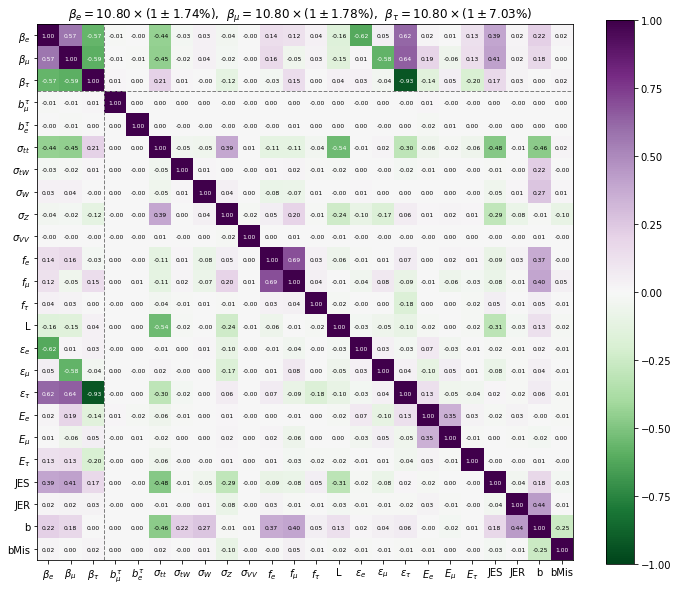

In [5]:
y,regu = model.forward(X)
loss = tc.sum( (y-Y)**2/(2*Y) ) + regu
    
hess = calculate_hessian(loss, model)
hessinv = np.linalg.inv(hess)
sigma   = np.sqrt(hessinv.diagonal())
corr  = hessinv/np.outer(sigma, sigma)

common.showParameterCovMat(corr,sigma)

In [1]:
# print(sigma[0:3]/0.1080*100)
# print(sigma[3:])

In [2]:
# for name, param in model.named_parameters():
#     if param.requires_grad:
#         print(name,param.data)

In [3]:
# print Model Paramters
# params = dict(model.named_parameters())
# bwe = params['layer_beta.bwe'].data
# bwm = params['layer_beta.bwm'].data
# bwt = params['layer_beta.bwt'].data
# print(bwe,bwm,bwt)